In [1]:
import numpy as np
import pandas as pd

import os

import warnings
warnings.filterwarnings("ignore") 

In [2]:
loan_data = pd.read_csv('lc_2016_2017.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [3]:
loan_data.shape


(759338, 72)

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

In [5]:
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [6]:
loan_data['good_bad'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off', 
                                                                   'Default', 'Late (31-120 days)', 'Late (16-30 days)'])
                                , 1 , 0)
#แปลงตัวแปรให้เป็นเลข ดีคือ0 ไม่ดีคือ1 ไม่ดีเช่นจ่ายเลท

In [7]:
loan_data.good_bad.value_counts()

0    702875
1     56463
Name: good_bad, dtype: int64

In [8]:
loan_data.good_bad.value_counts(normalize=True)

0    0.925642
1    0.074358
Name: good_bad, dtype: float64

In [9]:
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)
#เอาีเจอร์ที่ค่าหายไปเกินครึ่งออก

,0
member_id,1.000000
desc,0.999978
dti_joint,0.955223
annual_inc_joint,0.955220
verification_status_joint,0.955220
mths_since_last_record,0.814076
mths_since_last_major_derog,0.716720


In [10]:
loan_data.dropna(thresh = loan_data.shape[0]*0.5, how='all', axis=1, inplace=True)

In [11]:
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = loan_data.drop('good_bad', axis=1)
y = loan_data['good_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state=42)
#xคือเอาฟีเจอร์ทุกตัวยกเว้นค่าGood_bad
# ต้องการทำนายว่าดีหรือไม่ ถ้าดีควรให้สินเชื่อก็คือ0 ไม่ดีคือ1

In [14]:
y_train.value_counts(normalize=True)

0    0.925642
1    0.074358
Name: good_bad, dtype: float64

In [15]:
loan_data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,good_bad
0,112435993,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,...,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0,0
1,112290210,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,...,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0,0
2,112436985,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,...,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0,0
3,112439006,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,...,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0,0
4,112438929,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,...,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759333,65854936,6000,6000,6000.0,36 months,7.89,187.72,A,A5,Warehouse Clerk,...,NaN,NaN,NaN,NaN,NaN,21400.0,NaN,NaN,NaN,0
759334,66055600,6000,6000,6000.0,36 months,9.17,191.28,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,18600.0,NaN,NaN,NaN,0
759335,66141895,14400,14400,14400.0,60 months,13.18,328.98,C,C3,Meatcutter,...,NaN,NaN,NaN,NaN,NaN,18300.0,NaN,NaN,NaN,1
759336,65673209,34050,34050,34050.0,36 months,15.41,1187.21,D,D1,Supervisor,...,NaN,NaN,NaN,NaN,NaN,47900.0,NaN,NaN,NaN,0


In [16]:
y_test.value_counts(normalize=True)
#ค่าเทสกับเทรนพอๆกัน

0    0.925639
1    0.074361
Name: good_bad, dtype: float64

Data Cleaning

In [17]:
X_train.shape

(607470, 65)

In [18]:
 for col in X_train.select_dtypes(include= ['object','bool']).columns:
        print(col)
        print(X_train[col].unique())
        print()
#เช็คค่าคอลัมที่ควรลบ

term
['36 months' '60 months']

grade
['C' 'A' 'B' 'E' 'D' 'G' 'F']

sub_grade
['C1' 'A1' 'B1' 'B5' 'A4' 'E2' 'A5' 'D1' 'C4' 'C3' 'G3' 'D3' 'E1' 'C5'
 'D2' 'C2' 'A2' 'E3' 'D5' 'E4' 'B2' 'F2' 'B4' 'A3' 'D4' 'B3' 'F1' 'F5'
 'G2' 'E5' 'F3' 'G1' 'G5' 'F4' 'G4']

emp_title
['Administrative assistant' 'director of workforce development' 'Nanny'
 ... 'Operations Planning Manager' 'Sr. xPression Developer'
 'making plant planner']

emp_length
['4 years' '10+ years' '< 1 year' '5 years' '6 years' '7 years' '2 years'
 '3 years' '8 years' '1 year' nan '9 years']

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE']

verification_status
['Source Verified' 'Not Verified' 'Verified']

issue_d
['Feb-2017' 'Apr-2016' 'Jul-2017' 'Oct-2016' 'Mar-2017' 'May-2016'
 'Mar-2016' 'Aug-2017' 'Jul-2016' 'Jan-2017' 'Sep-2016' 'Aug-2016'
 'Nov-2016' 'Dec-2016' 'Jun-2016' 'Sep-2017' 'Feb-2016' 'May-2017'
 'Jun-2017' 'Apr-2017' 'Jan-2016']

loan_status
['Current' 'Fully Paid' 'Late (16-30 days)' 'Charged Off'
 'La

['Aug-1994' 'Sep-2001' 'May-1999' 'Jun-2005' 'Jan-2012' 'Jan-2001'
 'Aug-1991' 'Feb-2006' 'Oct-1989' 'Oct-2000' 'Jun-2001' 'Dec-1993'
 'May-1989' 'Sep-2006' 'Sep-1997' 'Sep-2003' 'May-1982' 'Dec-1996'
 'Jun-1999' 'Oct-2003' 'Sep-2008' 'May-1994' 'Sep-2004' 'Jul-2007'
 'Feb-2008' 'Aug-1985' 'Aug-2002' 'Nov-1998' 'Mar-2012' 'Feb-1993'
 'Aug-2001' 'May-1987' 'Mar-2004' 'Mar-1978' 'Apr-1996' 'Oct-1995'
 'May-2006' 'Oct-2012' 'Dec-2001' 'Jul-2001' 'May-2004' 'Feb-2005'
 'Jul-1995' 'May-2007' 'Feb-2004' 'Feb-2001' 'Jul-2004' 'Sep-1998'
 'Jul-2006' 'Sep-1993' 'Jun-2012' 'Jul-2005' 'Jun-2011' 'Nov-2006'
 'Nov-2002' 'Jan-1996' 'Jul-2003' 'Sep-2007' 'Aug-1999' 'Feb-1994'
 'Apr-2003' 'Aug-2004' 'Oct-2013' 'Dec-2002' 'May-2012' 'Aug-1998'
 'Aug-1997' 'Feb-1981' 'Oct-2004' 'Apr-2007' 'Mar-1993' 'Dec-1989'
 'Apr-2006' 'Apr-2005' 'Nov-2011' 'Aug-2008' 'Aug-2003' 'May-1997'
 'Apr-1997' 'Dec-2005' 'Oct-1990' 'Sep-1995' 'Dec-2004' 'Nov-1992'
 'Sep-2002' 'Aug-2009' 'Oct-1994' 'Aug-2007' 'Jun-1997' 'Jun-2

In [19]:
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 
                    'next_pymnt_d', 'last_credit_pull_d']

In [20]:
X_train['term'].str.replace(' months', '')

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: object

In [21]:
X_train['term'] = pd.to_numeric(X_train['term'].str.replace(' months', ''))
#charng to int

In [22]:
X_train['term']

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: int64

In [23]:
X_train['emp_length'].unique()

array(['4 years', '10+ years', '< 1 year', '5 years', '6 years',
       '7 years', '2 years', '3 years', '8 years', '1 year', nan,
       '9 years'], dtype=object)

In [24]:

X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')

X_train['emp_length'].fillna(value = 0, inplace=True)
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

In [25]:
X_train['emp_length']

147577     4
505776    10
412425     0
618730     5
111143     6
          ..
150426     8
195135     0
182511    10
82596      3
165904     1
Name: emp_length, Length: 607470, dtype: int64

In [26]:
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d',
                    'next_pymnt_d', 'last_credit_pull_d']

X_train[col_date]
#เช็คฟีเจอร์ในส่วนของวันที่

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,Feb-2017,Aug-1994,Dec-2017,Jan-2018,Dec-2017
505776,Apr-2016,Sep-2001,Jul-2017,NaN,Nov-2017
412425,Jul-2017,May-1999,Dec-2017,Jan-2018,Dec-2017
618730,Oct-2016,Jun-2005,Dec-2017,Jan-2018,Dec-2017
111143,Mar-2017,Jan-2012,Dec-2017,Jan-2018,Dec-2017
...,...,...,...,...,...
150426,Feb-2017,Nov-1998,Nov-2017,NaN,Dec-2017
195135,Jan-2017,Sep-1993,Dec-2017,Jan-2018,Dec-2017
182511,Jan-2017,Mar-1988,Dec-2017,Jan-2018,Dec-2017
82596,Apr-2017,Jan-2003,Dec-2017,Jan-2018,Dec-2017


In [27]:
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col])

In [28]:
X_test['term'] = pd.to_numeric(X_test['term'].str.replace(' months', ''))

X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '')

X_test['emp_length'].fillna(value = 0, inplace=True)
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])

for col in col_date:
    X_test[col] = pd.to_datetime(X_test[col])

In [29]:
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151868 entries, 280647 to 267584
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                151868 non-null  int64         
 1   emp_length          151868 non-null  int64         
 2   issue_d             151868 non-null  datetime64[ns]
 3   earliest_cr_line    151868 non-null  datetime64[ns]
 4   last_pymnt_d        151655 non-null  datetime64[ns]
 5   next_pymnt_d        118276 non-null  datetime64[ns]
 6   last_credit_pull_d  151867 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 9.3 MB


Feature Engineering

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((607470, 65), (607470,), (151868, 65), (151868,))

In [31]:
col_need_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [32]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

In [33]:
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']
#ไม่จำเป็น

In [34]:
X_train.shape, X_test.shape

((607470, 6), (151868, 6))

In [35]:
from datetime import date

date.today().strftime('%Y-%m-%d')

'2023-04-12'

In [37]:
def date_columns(df, column):
    today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    df.drop(columns = [column], inplace=True)
    
# apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')


In [38]:
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [39]:
X_test.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line        0
mths_since_issue_d                 0
mths_since_last_pymnt_d          213
mths_since_last_credit_pull_d      1
dtype: int64

In [40]:
X_train.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line        0
mths_since_issue_d                 0
mths_since_last_pymnt_d          735
mths_since_last_credit_pull_d     17
dtype: int64

In [41]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

Model

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [67]:
X_test

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
280647,60,10,281.0,81.0,71.0,64.0
419992,36,7,207.0,69.0,64.0,64.0
44633,36,0,556.0,71.0,65.0,71.0
245940,36,2,208.0,80.0,65.0,64.0
565744,36,0,630.0,77.0,64.0,64.0
...,...,...,...,...,...,...
70748,36,4,133.0,71.0,64.0,64.0
43047,60,4,249.0,71.0,64.0,64.0
99030,36,0,236.0,72.0,64.0,73.0
625689,36,1,128.0,85.0,64.0,64.0


In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
model

LogisticRegression()

In [45]:
result = pd.DataFrame(list(zip(y_pred,y_test)), columns = ['y_pred', 'y_test'])
result.head()

,y_pred,y_test
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9173163536755603

In [47]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

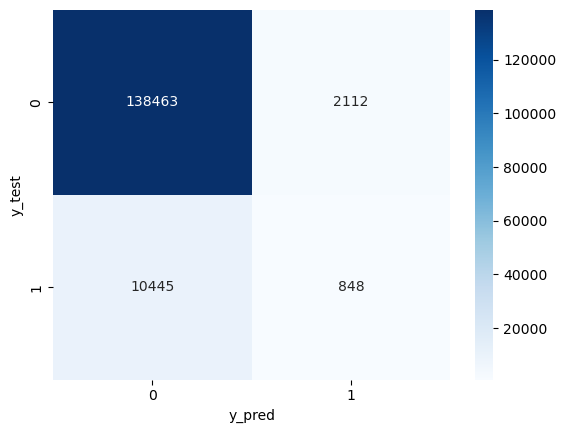

In [48]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

In [49]:
y_train.value_counts(normalize=True)

0    0.925642
1    0.074358
Name: good_bad, dtype: float64

In [52]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
y_pred = model.predict_proba(X_test)[:, 1]

In [54]:
y_pred

array([0.22541291, 0.02482469, 0.01041175, ..., 0.00885653, 0.06502077,
       0.0370537 ])

In [55]:
(y_pred > 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

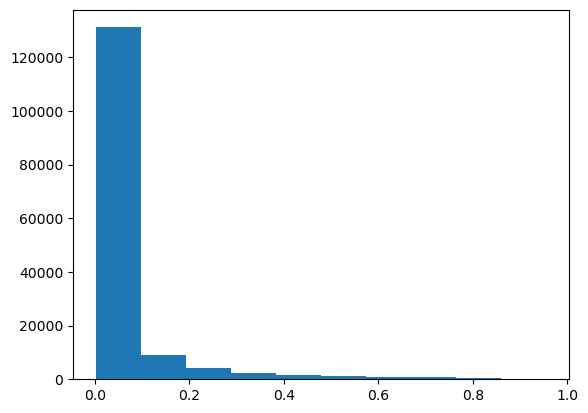

In [56]:
plt.hist(y_pred);

In [57]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [58]:
j = tpr - fpr

ix = np.argmax(j)

best_thresh = thresholds[ix]
best_thresh

0.06645572914609706

In [59]:

y_pred = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred > 0.066).astype(int)

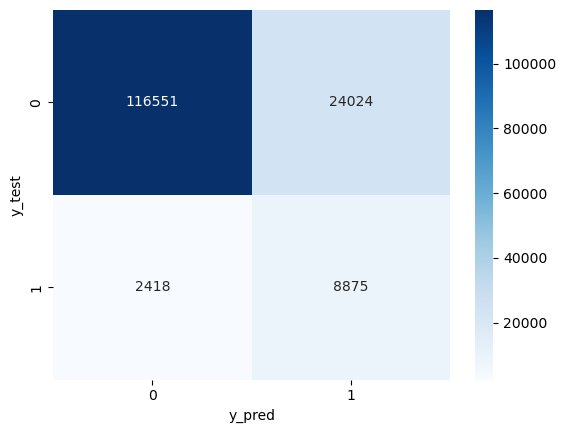

In [60]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

In [61]:
model.coef_

array([[ 0.01726729, -0.03157619, -0.00103491,  0.04585909,  0.23471007,
        -0.15283594]])

In [62]:
model.intercept_

array([-12.26136126])

In [63]:
df_coeff = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coeff

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,0.017267,-0.031576,-0.001035,0.045859,0.23471,-0.152836


In [65]:
X_train.head()
#ค่าที่ใช้ทำนาย

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
147577,36,4,344.0,74.0,64.0,64.0
505776,36,10,259.0,84.0,69.0,65.0
412425,36,0,287.0,69.0,64.0,64.0
618730,36,5,214.0,78.0,64.0,64.0
111143,36,6,135.0,73.0,64.0,64.0


In [68]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])